In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [21]:
np.random.seed(233)
x = np.random.uniform(-4,2, size=100)
y = x**2 + 4*x + 3 + 2 + np.random.randn(100)
X = x.reshape(-1, 1)

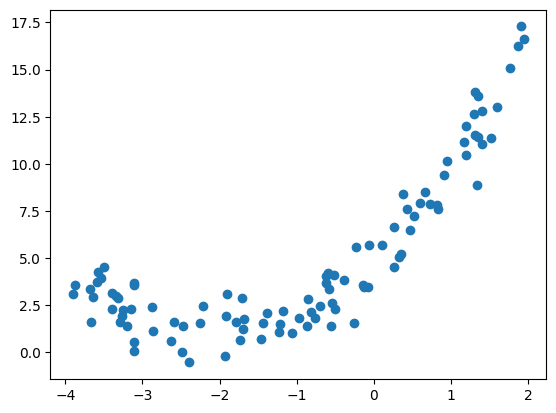

In [22]:
plt.scatter(x,y)

### 欠拟合

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [24]:
lin_reg.fit(X,y)

LinearRegression()

In [25]:
y_predict = lin_reg.predict(X)

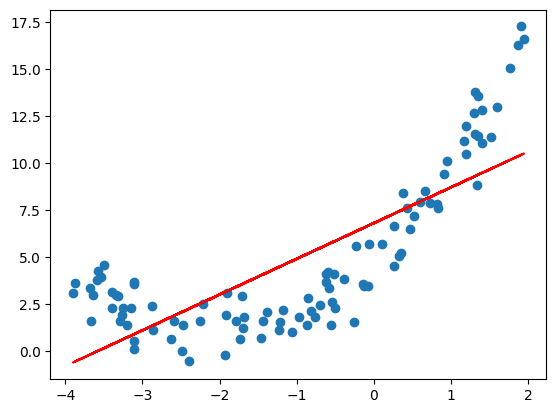

In [26]:
plt.scatter(x, y)
plt.plot(X, y_predict, 'r')

In [29]:
lin_reg.score(X, y)

0.6028175347745823

### 过拟合

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
x_poly[:5]

array([[ 1.        , -3.1031852 ,  9.62975838],
       [ 1.        ,  1.35329359,  1.83140354],
       [ 1.        , -0.50100615,  0.25100716],
       [ 1.        ,  1.39844105,  1.95563738],
       [ 1.        , -1.90656706,  3.63499794]])

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression()

In [40]:
lin_reg.score(x_poly, y)    #不会过拟合

0.9415982435154331

In [33]:
y_predict = lin_reg.predict(x_poly)

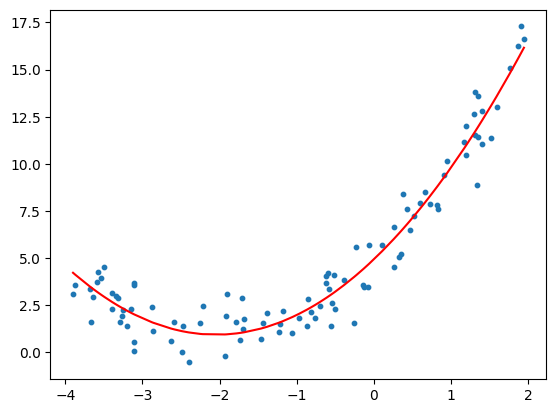

In [38]:
plt.scatter(x, y, s=10)    # 这里的x还是一个列向量，注意换成行向量否则是一堆0
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='red')

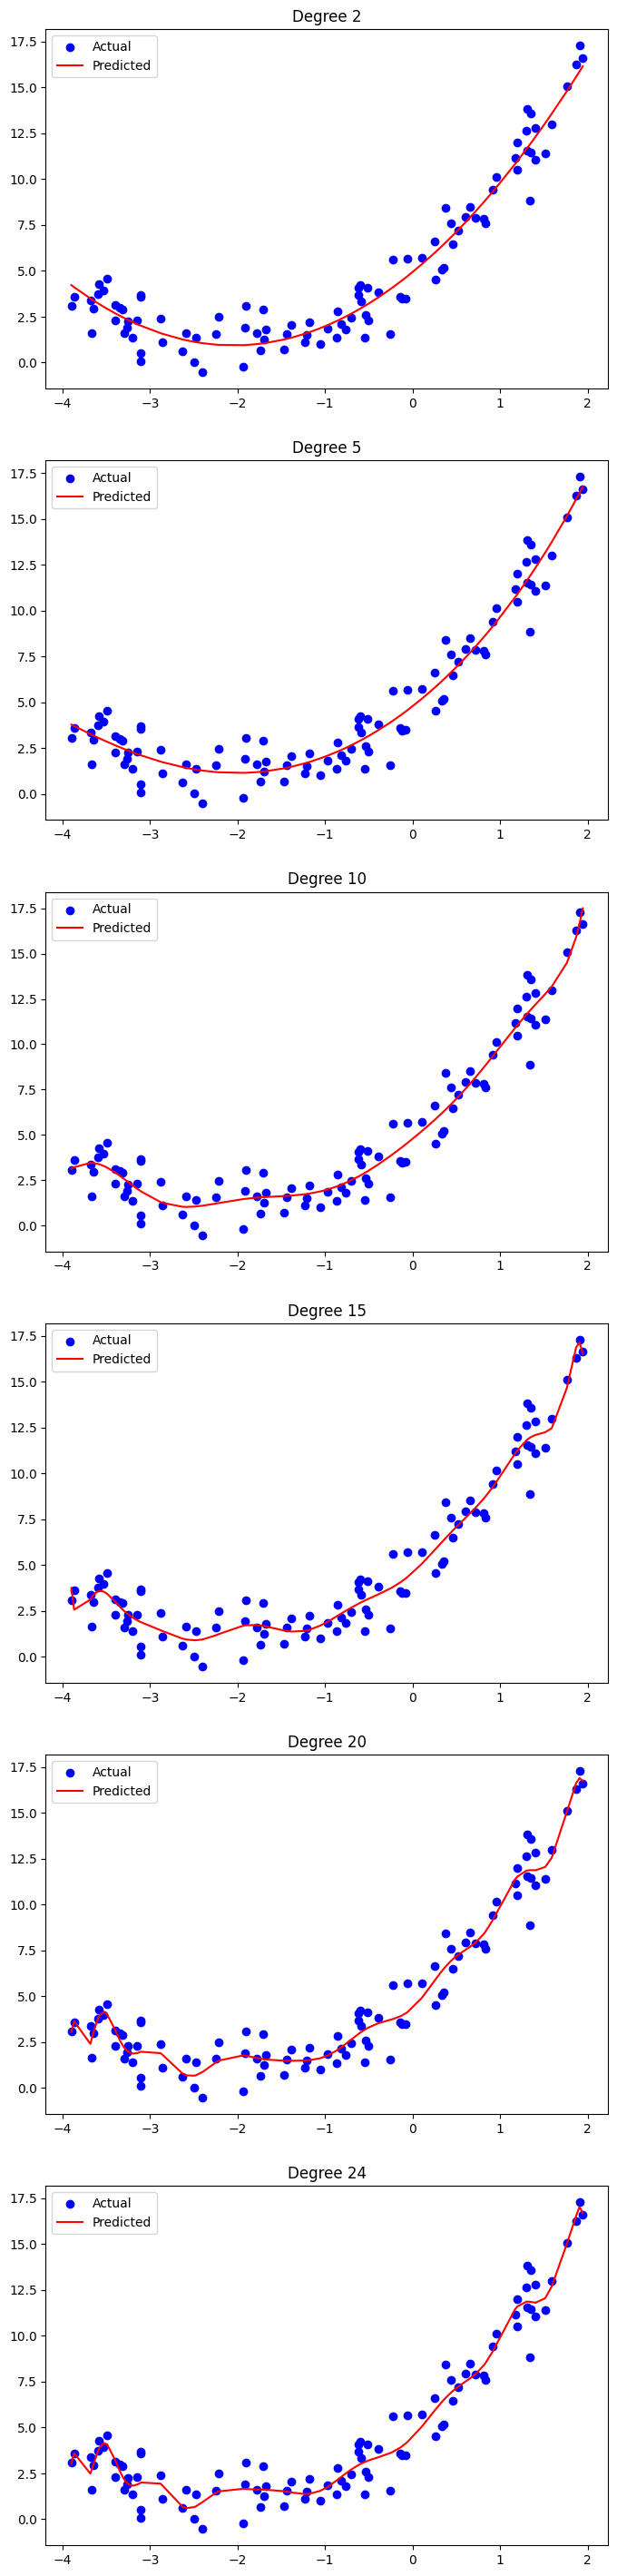

In [60]:
degrees = [2, 5, 10, 15, 20, 24]
fig, axs = plt.subplots(len(degrees), 1, figsize=(8, 6 * len(degrees)))
for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree = degree)
    x_poly = polynomial_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    y_pred = lin_reg.predict(x_poly)
    axs[i].scatter(X, y, color='blue', label='Actual')
    axs[i].plot(np.sort(x), y_pred[np.argsort(x)], color='red', label='Predicted')
    axs[i].set_title(f'Degree {degree}')
    axs[i].legend()
    # print(lin_reg.score(x_poly, y))